# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12.3 </span>

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [156]:
import os
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

In [157]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [158]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [159]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), #applico conv con mat 5x5
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.5))# Dropout, spegne alcuni neuroni, con rate (0.5)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())# Moving towards a standard flat layer in the final part
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax')) 
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['acc'])
    return model

In [160]:
# training parameters
batch_size = 32
epochs = 20# INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2322 - acc: 0.9318 - val_loss: 0.1167 - val_acc: 0.9756
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0918 - acc: 0.9726 - val_loss: 0.0832 - val_acc: 0.9788
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0726 - acc: 0.9776 - val_loss: 0.0809 - val_acc: 0.9783
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0587 - acc: 0.9812 - val_loss: 0.0657 - val_acc: 0.9825
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0518 - val_acc: 0.9850
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0450 - acc: 0.9852 - val_loss: 0.0533 - val_acc: 0.9836
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0396 - acc: 0.9871 - val_loss: 0.0457 - val_acc: 0.9856
Epoch 8/20
1875/1875 [============================

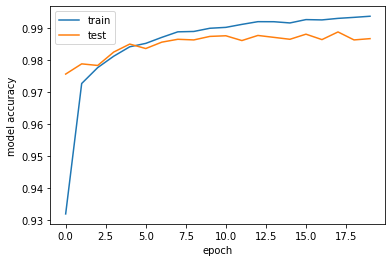

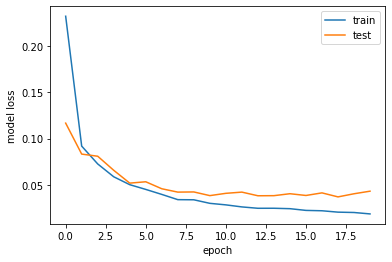

In [163]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

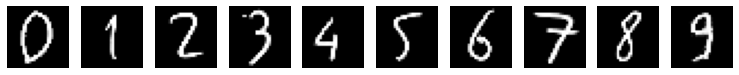

In [191]:
from PIL import Image
import os

data = []
plt.figure(figsize=(13,10))

for l in range(10):
    index = str(l)
    digit_filename = index+"_test.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data_back = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data_back[i,j]=pix[j,i]/255
    data.append(data_back)

    ax = plt.subplot(6, 10, l + 1)
    plt.imshow(data[l], cmap='gray')
    plt.axis('off')
plt.show()

    #print(data.shape)

I use the previously trained DNN to predict the digit:

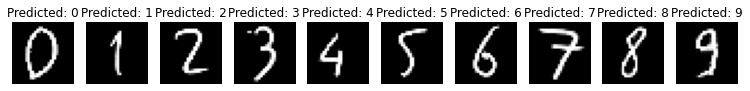

In [192]:
plt.figure(figsize=(13,10))

for l in range(10):
    data1 = data[l].reshape(1, xdim, ydim, 1)  # Reshape to match CNN input shapeprint(data.shape)
    pred_0 = model_CNN.predict(data1, verbose=0)

    data1 = data1.reshape(xdim,ydim)


    ax = plt.subplot(3, 10, l + 1)
    plt.imshow(data1, cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    
plt.show()